In [ ]:
!apt-get install mecab libmecab-dev mecab-ipadic-utf8
!pip install mecab-python3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import requests
from bs4 import BeautifulSoup

def get_news_by_url(url):
  res = requests.get(url)
  bs = BeautifulSoup(res.content, 'html.parser')

  title = bs.select('h2#title_area')[0].text #제목
  content = bs.select('#dic_area')[0].get_text().replace('\n', " ")
  content = content.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
  return  content.strip()

docs = []
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=018&aid=0004430108') )
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=001&aid=0011614790') )
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=014&aid=0004424362') )
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=119&aid=0002402191') )
docs.append( get_news_by_url('https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002882728') )
len(docs)

5

In [ ]:
docs

['과기정통부, 22일 유영민 장관 등 참석해 기념행사2021년까지 1516억원 투입, 5100여종 데이터 구축민간 클라우드 통한 외부연계체계도.."개방성 강화"[이데일리 이재운 기자] 국가 차원의 빅데이터 활용 시대가 열린다. 새로운 산업 창출과 기존 산업의 변화에 이르는 ‘혁신성장’을 위한 센터가 문을 연다. 10개 분야에 걸쳐 ‘데이터 경제’의 발전을 위한 정부의 청사진을 현실로 구현하는데 앞장선다는 계획이다.22일 과학기술정보통신부는 서울 중구 대한상공회의소에서 데이터 생태계 조성과 혁신 성장의 기반 마련을 위한 ‘빅데이터 플랫폼 및 센터’ 출범식 행사를 개최했다. 유영민 과기정통부 장관을 비롯해 노웅래 국회 과학기술정보방송통신위원회 위원장 등 300여명이 참가했다.◇10개 분야 100개 센터..3년간 1516억원 투입    이미지: 픽사베이빅데이터는 데이터 활용을 통해 혁신성장을 이루자는 문재인 정부의 경제 성장 핵심 요소중 하나다. 문재인 대통령이 직접 올 들어 데이터 활용과 이에 따른 정보보호(보안)에 대한 중요성을 강조하기도 했다.이런 맥락 속에서 빅데이터센터는 공공과 민간이 협업해 활용도 높은 양질의 데이터를 생산·구축하고, 플랫폼은 이를 수집·분석·유통하는 역할을 담당한다. 과기정통부는 분야별 플랫폼 10개소와 이와 연계된 기관별 센터 100개소를 구축하는데 3년간 총 1516억원을 투입할 계획이며, 올해 우선 640억원 규모의 사업을 추진하고 있다.대상 분야는 △금융(BC카드) △환경(한국수자원공사) △문화(한국문화정보원) △교통(한국교통연구원) △헬스케어(국립암센터) △유통·소비(매일방송) △통신(KT) △중소기업(더존비즈온) △지역경제(경기도청) △산림(한국임업진흥원) 등으로 현재 1차 공모를 통해 72개 빅데이터 센터를 선정했고, 다음달 8일까지 2차 공모를 통해 28개를 추가 선정해 총 100개를 지원, 운영할 계획이다. 이를 통해 데이터 생태계를 혁신하고 기업의 경쟁력을 제고하는 역할을 수행한다.주요 활용 전략·사례를 보면 빅데이터

In [ ]:
!pip install konlpy

In [ ]:

mecab = Mecab()
preprocessed_docs = []

for d in docs:
  preprocessed_docs.append(' '.join([ t[0] for t in mecab.pos(d) if t[1][0] in ['N','V']]))

In [ ]:
preprocessed_docs

['과기 정통부 일 유영민 장관 등 참석 기념행사 년 억 원 투입 여종 데이터 구축 민간 클라우드 통한 외부 연계 체계 개방 강화 데일리 이재운 기자 국가 차원 빅 데이터 활용 시대 열린다 새로운 산업 창출 기존 산업 변화 이르 혁신 장 위한 센터 문 연다 개 분야 걸쳐 데이터 경제 발전 위한 정부 청사진 현실 구현 데 앞장선다는 계획 이 일 과학 기술 정보 통신부 서울 중구 대한 상공 회의소 데이터 생태 조성 혁신 장 기반 마련 위한 빅 데이터 플랫 폼 센터 출범식 행사 개최 유영민 과기 정통부 장관 노웅래 국회 과학 기술 정보 방송 통신 위원회 위원장 등 명 참가 개 분야 개 센터 년 간 억 원 투입 이미지 픽사 베이 빅 데이터 데이터 활용 통해 혁신 장 이루 문재 인 정부 경제 성장 핵심 요소 중 하나 다 문재인 대통령 올 들 데이터 활용 이 따른 정보 보호 보안 대한 중요 강조 했 맥락 속 빅 데이터 센터 공공 민간 협업 활용 높 양질 데이터 생산 구축 플랫 폼 이 수집 분석 유통 역할 담당 과기 정통부 분야 플랫 폼 개소 이 연계 기관 센터 개소 구축 데 년 억 원 투입 계획 이 올해 억 원 규모 사업 추진 있 대상 분야 금융 카드 환경 한국 수자원 공사 문화 한국 문화 정보원 교통 한국 교통 연구원 헬 스케어 국립암센터 유통 소비 매일 방송 통신 중소기업 존 비즈 온 지역 경제 경기도 청 산림 한국 임업 흥원 등 차 공모 통해 개 빅 데이터 센터 선정 다음 달 일 차 공모 통해 개 추가 선정 개 지원 운영 계획 이 이 통해 데이터 생태계 혁신 기업 경쟁력 제고 역할 수행 주요 활용 전략 사례 보 빅 데이터 활용 통해 신 新 시장 창출 방안 담 있 금융 플랫 폼 경우 소 상공 인 신용 평가 고도 등 통해 금융 취약 계층 대상 중 금리 대출 자를 절감 연간 조 원 신규 대출 창출 전망 이 유통 소비 중소기업 플랫 폼 소상 공인 중소기업 폐업 감소 문화 플랫 폼 문화 예술 관람 생활 체육 참여 높이 방안 모색 의료비 절감 헬스 케어 기업 매출 향상 통한 

#TF-IDF 계산

In [ ]:
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import TfidfVectorizer

def keyword_extration(docs, no_doc, n):
  mecab = Mecab()
  preprocessed_docs = []

  for d in docs:
    preprocessed_docs.append(' '.join([ t[0] for t in mecab.pos(d) if t[1][0] in ['N','V']]))

  tfidf_vect = TfidfVectorizer()
  tfidf_vect.fit(preprocessed_docs)

  tfidf_v = tfidf_vect.transform([preprocessed_docs[no_doc]])
  keyword = tfidf_v.tocoo()

  sorted_words = sorted(zip(keyword.col, keyword.data), key=lambda x:(x[1], x[0]), reverse=True)[:n]
  feature_name = tfidf_vect.get_feature_names_out()

  return [(feature_name[i], score) for i, score in sorted_words]

In [ ]:
keyword_extration(docs,0,5)

[('데이터', 0.4604076795576656),
 ('플랫', 0.21817808060703886),
 ('계획', 0.18700978337746188),
 ('센터', 0.16337046693981683),
 ('정통부', 0.15584148614788493)]

# gensim 사용

In [ ]:
from konlpy.tag import Mecab
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

def keyword_extration_gensim(docs, no_doc, n):
  mecab = Mecab()
  preprocessed_docs = []

  for d in docs:
    preprocessed_docs.append([t[0] for t in mecab.pos(d) if t[1][0] in ['N','V']])

  dct = Dictionary(preprocessed_docs)
  corpus = [dct.doc2bow(d) for d in preprocessed_docs]
  tfidf = TfidfModel(corpus)

  sorted_words = sorted(tfidf[corpus[0]], key=lambda x :(x[1], x[0]), reverse=True)[:n]
  return [(dct[i], score) for i, score in sorted_words]

In [ ]:
keyword_extration_gensim(docs, 0, 5)

[('플랫', 0.25975285032756207),
 ('폼', 0.25975285032756207),
 ('계획', 0.2226453002807675),
 ('정통부', 0.1855377502339729),
 ('과기', 0.1855377502339729)]

# TextRank
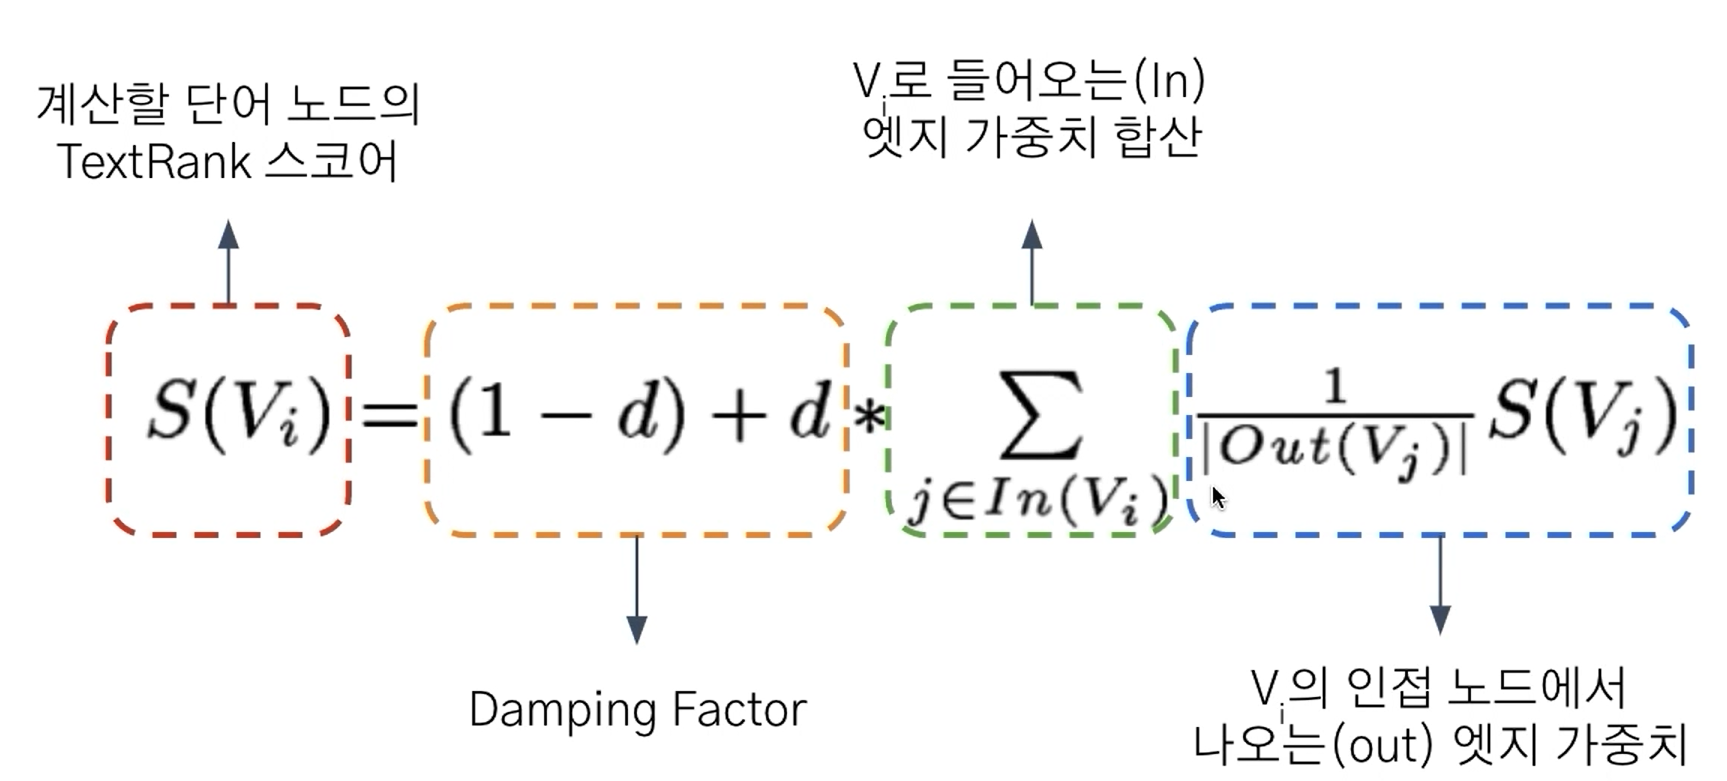

In [1]:
tokens = ['딸기', '바나나', '사과', '딸기', '파인애플']
nodes = ['바나나','사과','파인애플','딸기']

vocab2idx = { nodes[i]:i for i in range(0,len(nodes))}
idx2vocab = {i:nodes[i] for i in range(0, len(nodes))}

In [2]:
idx2vocab

{0: '바나나', 1: '사과', 2: '파인애플', 3: '딸기'}

TextRank는 그래프 기반 모델.
각 단어는 그래프의 노드.
weighted_edge 행렬은 노드간 가중치 정보를 가짐.
weighted_edge[i][j]는 i번째 단어와 j번째 단어의 가중치, 0인 경우는 노드간 연결 없음.

In [8]:
import numpy as np

vocab_len = len(nodes)

#가중치 행렬 초기화
weighted_edge = np.zeros((vocab_len, vocab_len), dtype=np.float32)

#노드별 스코어 1로 초기화
score = np.ones((vocab_len), dtype=np.float32)

window_size=2
for window_start in range(0, len(tokens)-window_size+1):
  window = tokens[window_start : window_start + window_size]
  for i in range(window_size):
    for j in range(i+1, window_size):
      if(window[i] in vocab2idx.keys()) & (window[j] in vocab2idx.keys()):
        index_of_i = window_start + i
        index_of_j = window_start + j

        weighted_edge[vocab2idx[window[i]],  vocab2idx[window[j]]] = 1
        weighted_edge[vocab2idx[window[j]],  vocab2idx[window[i]]] = 1

In [9]:
weighted_edge

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 1., 1., 0.]], dtype=float32)

In [10]:
for i in range(0, vocab_len):
  sum_i = weighted_edge[i].sum()
  weighted_edge[i] = weighted_edge[i] / sum_i if sum_i>0 else 0

In [11]:
weighted_edge

array([[0.        , 0.5       , 0.        , 0.5       ],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.33333334, 0.33333334, 0.33333334, 0.        ]], dtype=float32)

In [12]:
score

array([1., 1., 1., 1.], dtype=float32)

각 노드의 score 계산

In [26]:
MAX_ITERATIONS = 50
d = 0.85
threshold = 0.0001

for iter in range(0, MAX_ITERATIONS):
  prev_score = np.copy(score)
  for i in range(0, vocab_len):
    sum = 0
    for j in range(0, vocab_len):
      if weighted_edge[j][i] != 0:
        sum += weighted_edge[j][i] * score[j]

    score[i] = (1-d) + d*sum

  if np.sum(np.fabs(prev_score - score)) <= threshold:
    break

In [30]:
sorted_index = np.flip(np.argsort(score), 0)

n = 4
for i in range(0, n):
  print(str(idx2vocab[sorted_index[i]]) + ':' + str(score[sorted_index[i]]))

딸기:1.466888
사과:0.98367
바나나:0.9836653
파인애플:0.56561226


Graph 사용한 weighted edge 계산

In [40]:
tokens = ['ST','BN','APP','ST','PIN']
nodes = ['BN','APP','PIN','ST']

vocab2idx = {nodes[i]:i for i in range(0, len(nodes))}
idx2vocab = {i:nodes[i]  for i in range(0, len(nodes))}
import numpy as np
import networkx as nx

window_size = 2
edges = []

for window_start in range(0, len(tokens)-window_size+1):
  window = tokens[window_start : window_start + window_size]
  for i in range(window_size):
    for j in range(i+1, window_size):
      if(window[i] in vocab2idx.keys()) & (window[j] in vocab2idx.keys()) :
        edges.append((window[i], window[j]))

g = nx.diamond_graph()
g.clear()

g.add_nodes_from(list(set(tokens)))
g.add_edges_from(edges)

In [41]:
edges

[('ST', 'BN'), ('BN', 'APP'), ('APP', 'ST'), ('ST', 'PIN')]

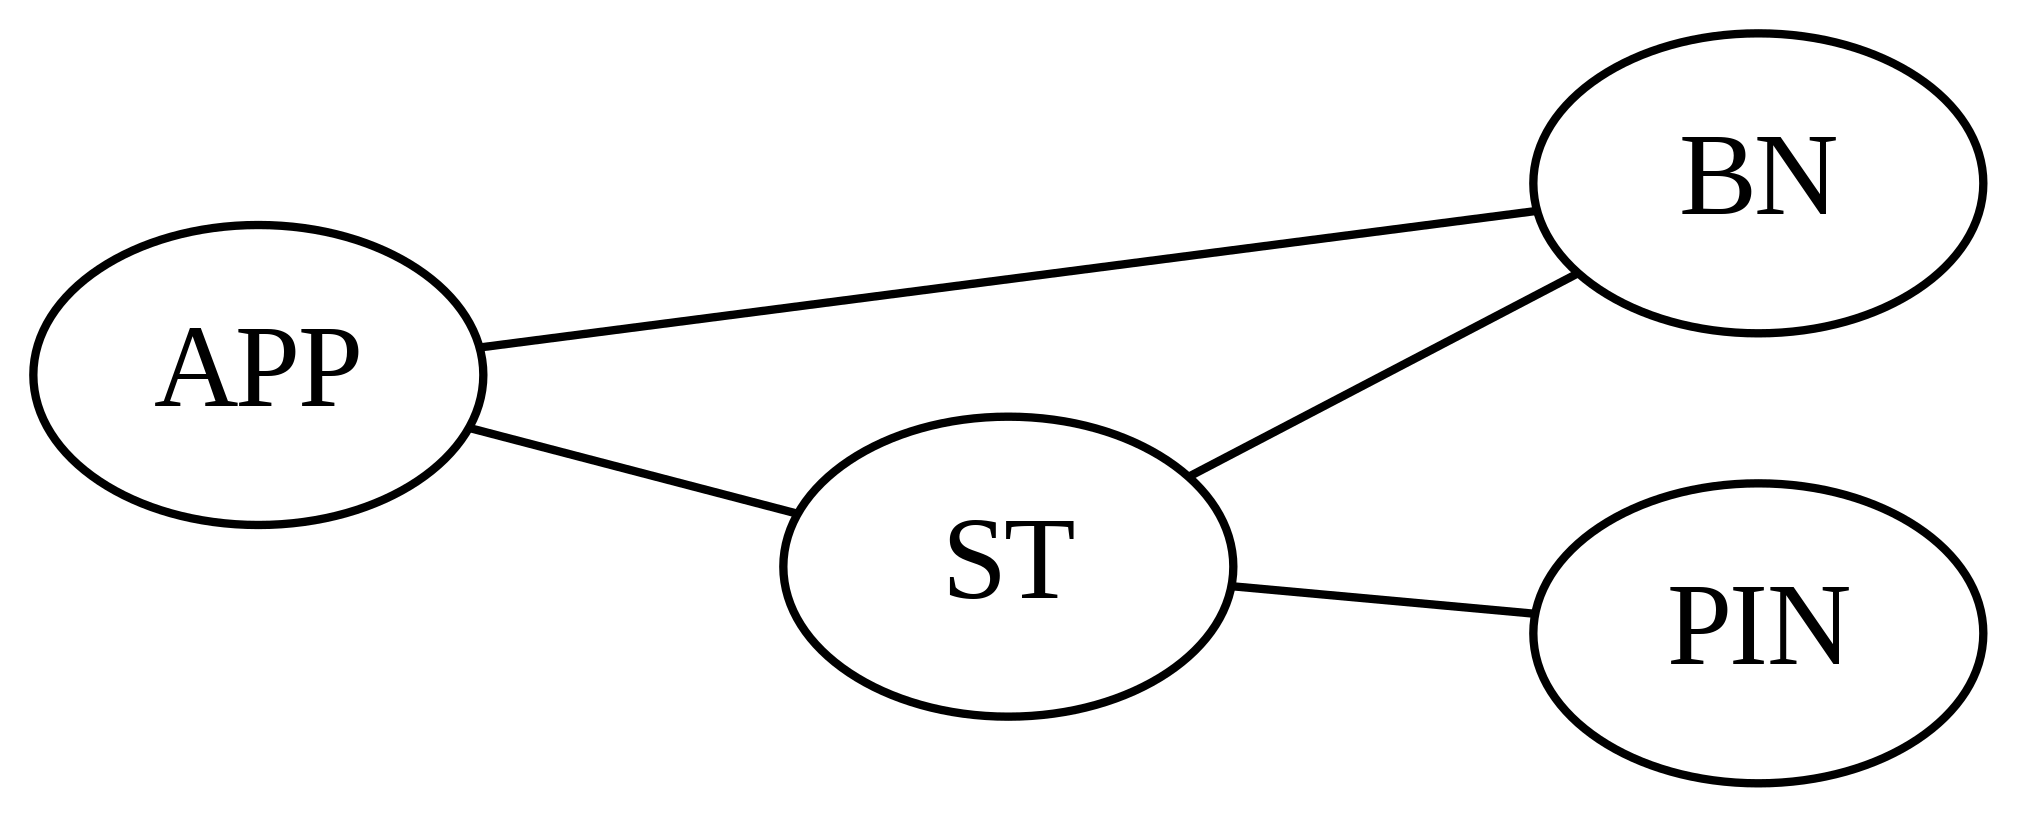

In [43]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d = to_pydot(g)
d.set_dpi(600)
d.set_rankdir('LR')
Image(d.create_png(), width=600)

In [47]:
scores = nx.pagerank(g)
sorted(score.items(), key=lambda x: x[1], reverse=True)[:4]

[('ST', 0.3667352990529791),
 ('APP', 0.2459279727012903),
 ('BN', 0.2459279727012903),
 ('PIN', 0.1414087555444403)]